In [1]:
#Logistic Regression + ROC-AUC use for classification problem only

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
claimants=pd.read_csv("C:/Users/LENOVO/OneDrive/Desktop/Data Science/python/claimants.csv")

In [4]:
claimants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CASENUM   1340 non-null   int64  
 1   ATTORNEY  1340 non-null   int64  
 2   CLMSEX    1328 non-null   float64
 3   CLMINSUR  1299 non-null   float64
 4   SEATBELT  1292 non-null   float64
 5   CLMAGE    1151 non-null   float64
 6   LOSS      1340 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 73.4 KB


In [5]:
claimants.head()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038


In [6]:
'''
0-Is represted by Attorney, 1-not represented by Attorney.
CLMSEX-> 0-Male, 1- Female
CLMINSUR-> 0-Uninsured, 1- Insured.
SEATBELT-> 0- Wearing seatbelt, 1- Not weaaring seatbelt.

Predict weathere Claiment will be presented by the Attorney or not~ Classification Data

'''

'\n0-Is represted by Attorney, 1-not represented by Attorney.\nCLMSEX-> 0-Male, 1- Female\nCLMINSUR-> 0-Uninsured, 1- Insured.\nSEATBELT-> 0- Wearing seatbelt, 1- Not weaaring seatbelt.\n\nPredict weathere Claiment will be presented by the Attorney or not~ Classification Data\n\n'

In [3]:
# Droping unwanted column
claimants.drop(['CASENUM'],inplace=True,axis=1)

In [8]:
claimants.head()

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0,0.0,1.0,0.0,50.0,34.940
1,1,1.0,0.0,0.0,18.0,0.891
2,1,0.0,1.0,0.0,5.0,0.330
3,0,0.0,1.0,1.0,31.0,0.037
4,1,0.0,1.0,0.0,30.0,0.038


In [81]:
#Checking data is blanced or not.

claimants['ATTORNEY'].value_counts()

0    685
1    655
Name: ATTORNEY, dtype: int64

<AxesSubplot:xlabel='ATTORNEY', ylabel='count'>

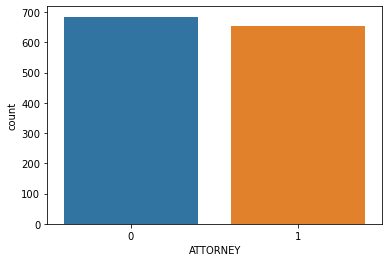

In [10]:
 sns.countplot(x='ATTORNEY',data=claimants)

In [11]:
#Checking people who have insurance or not and recived ATTORNEY or not.

pd.crosstab(claimants.ATTORNEY,claimants.CLMINSUR)

CLMINSUR,0.0,1.0
ATTORNEY,,
0,76,585
1,44,594


<AxesSubplot:xlabel='CLMSEX', ylabel='count'>

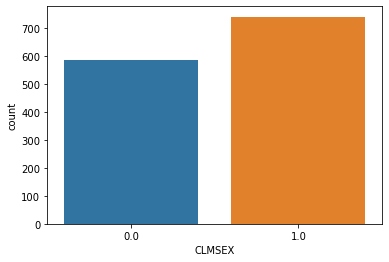

In [12]:
sns.countplot(x='CLMSEX',data=claimants)

In [13]:
#Checking with sex and insurance

pd.crosstab(claimants.CLMSEX,claimants.CLMINSUR)

CLMINSUR,0.0,1.0
CLMSEX,,
0.0,65,501
1.0,55,669


<AxesSubplot:xlabel='CLMSEX'>

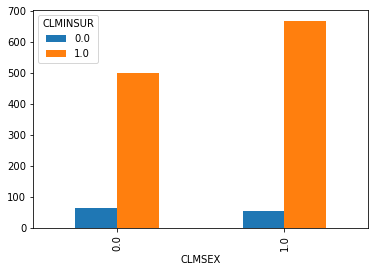

In [14]:
pd.crosstab(claimants.CLMSEX,claimants.CLMINSUR).plot(kind='bar')

<AxesSubplot:xlabel='SEATBELT', ylabel='count'>

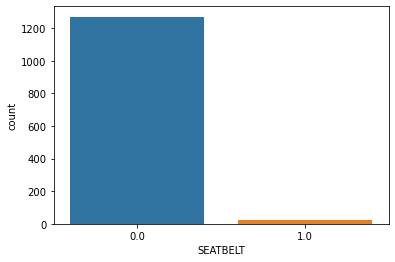

In [15]:
sns.countplot(x='SEATBELT',data=claimants)

<AxesSubplot:xlabel='SEATBELT'>

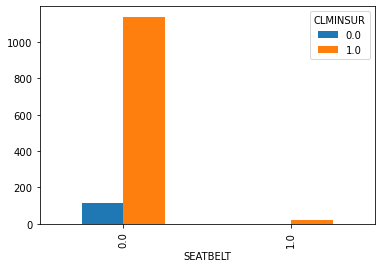

In [16]:
#Relationship between seatbelt and insurance

pd.crosstab(claimants.SEATBELT,claimants.CLMINSUR).plot(kind='bar')

In [17]:
claimants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ATTORNEY  1340 non-null   int64  
 1   CLMSEX    1328 non-null   float64
 2   CLMINSUR  1299 non-null   float64
 3   SEATBELT  1292 non-null   float64
 4   CLMAGE    1151 non-null   float64
 5   LOSS      1340 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 62.9 KB


In [18]:
claimants.isnull().sum()

ATTORNEY      0
CLMSEX       12
CLMINSUR     41
SEATBELT     48
CLMAGE      189
LOSS          0
dtype: int64

In [82]:
claimants.CLMSEX.mode()[0]

1.0

In [4]:
claimants['CLMSEX'].fillna(claimants.CLMSEX.mode()[0],inplace=True)

In [84]:
claimants.isnull().sum()

ATTORNEY      0
CLMSEX        0
CLMINSUR     41
SEATBELT     48
CLMAGE      189
LOSS          0
dtype: int64

In [85]:
claimants.CLMINSUR.mode()[0]

1.0

In [5]:
claimants['CLMINSUR'].fillna(claimants.CLMINSUR.mode()[0],inplace=True)

In [24]:
claimants.isnull().sum()

ATTORNEY      0
CLMSEX        0
CLMINSUR      0
SEATBELT     48
CLMAGE      189
LOSS          0
dtype: int64

In [87]:
claimants.SEATBELT.mode()[0]

0.0

In [6]:
claimants['SEATBELT'].fillna(claimants.SEATBELT.mode()[0],inplace=True)

In [27]:
claimants.isnull().sum()

ATTORNEY      0
CLMSEX        0
CLMINSUR      0
SEATBELT      0
CLMAGE      189
LOSS          0
dtype: int64

In [89]:
claimants.CLMAGE.mean()

28.414422241529106

In [7]:
claimants['CLMAGE'].fillna(claimants.CLMAGE.mean(),inplace=True)

In [8]:
claimants.isnull().sum()

ATTORNEY    0
CLMSEX      0
CLMINSUR    0
SEATBELT    0
CLMAGE      0
LOSS        0
dtype: int64

In [9]:
#Model Building

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [10]:
#Extracting X and Y

x=claimants.iloc[:,[1,2,3,4,5]]
y=claimants.iloc[:,0]

In [11]:
#Training/fitting/testing

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=23)

In [12]:
model=LogisticRegression()


In [13]:
model.fit(x_train,y_train)

LogisticRegression()

In [14]:
model.coef_

array([[ 0.2506139 ,  0.46778708, -0.46421583,  0.00667035, -0.34058373]])

In [15]:
model.intercept_

array([-0.00538614])

In [16]:
model.predict_proba(x_train)     #probability

array([[0.45560517, 0.54439483],
       [0.3714692 , 0.6285308 ],
       [0.61142709, 0.38857291],
       ...,
       [0.43919332, 0.56080668],
       [0.34755508, 0.65244492],
       [0.77224967, 0.22775033]])

In [17]:
#Making Prediction

y_pred=model.predict(x_train)

In [99]:
y_pred

array([1, 1, 0, ..., 1, 1, 0], dtype=int64)

In [41]:
#Clubing y_pred with x_train

x_train['y_pred']=y_pred      #new column name= from syntax

<ipython-input-41-98426618b82b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train['y_pred']=y_pred      #new column name= from syntax


In [42]:
x_train

,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,y_pred
1211,1.0,1.0,0.0,9.000000,1.747,1
483,0.0,1.0,0.0,28.414422,0.370,1
45,1.0,1.0,0.0,28.414422,3.981,0
1200,0.0,0.0,0.0,15.000000,1.009,0
962,1.0,1.0,0.0,45.000000,0.350,1
...,...,...,...,...,...,...
31,0.0,1.0,0.0,28.414422,0.337,1
950,0.0,1.0,0.0,9.000000,0.300,1
1064,1.0,1.0,0.0,14.000000,1.650,1
742,1.0,1.0,0.0,8.000000,0.401,1


In [43]:
pd.concat([x_train,y_train],axis=1)

,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,y_pred,ATTORNEY
1211,1.0,1.0,0.0,9.000000,1.747,1,1
483,0.0,1.0,0.0,28.414422,0.370,1,1
45,1.0,1.0,0.0,28.414422,3.981,0,1
1200,0.0,0.0,0.0,15.000000,1.009,0,1
962,1.0,1.0,0.0,45.000000,0.350,1,1
...,...,...,...,...,...,...,...
31,0.0,1.0,0.0,28.414422,0.337,1,1
950,0.0,1.0,0.0,9.000000,0.300,1,1
1064,1.0,1.0,0.0,14.000000,1.650,1,0
742,1.0,1.0,0.0,8.000000,0.401,1,1


In [18]:
#Confusing matrics
from sklearn.metrics import confusion_matrix,accuracy_score

In [19]:
confusion_matrix(y_train,y_pred)

array([[350, 198],
       [113, 411]], dtype=int64)

In [20]:
accuracy_score(y_train,y_pred)

0.7098880597014925

In [47]:
#predicting in testing data
y_pred_test=model.predict(x_test)

In [48]:
y_pred_test

array([0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1], dtype=int64)

In [49]:
confusion_matrix(y_test,y_pred_test)

array([[ 73,  64],
       [ 26, 105]], dtype=int64)

In [50]:
accuracy_score(y_test,y_pred_test)

0.664179104477612

In [51]:
#Precession, Recall and F1 score

from sklearn.metrics import classification_report

In [52]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.74      0.53      0.62       137
           1       0.62      0.80      0.70       131

    accuracy                           0.66       268
   macro avg       0.68      0.67      0.66       268
weighted avg       0.68      0.66      0.66       268



In [53]:
print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.64      0.69       548
           1       0.67      0.78      0.73       524

    accuracy                           0.71      1072
   macro avg       0.72      0.71      0.71      1072
weighted avg       0.72      0.71      0.71      1072



# ROC - AUC

In [54]:
#ROC=Receiver Operation Characteristic
#AUC= Area under curve

In [21]:
from sklearn import metrics

In [56]:
FPR,TPR,thershold=metrics.roc_curve(y_train,y_pred)     #FPR=False positive rate and TPR=True positive rate

In [22]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'trur positive')

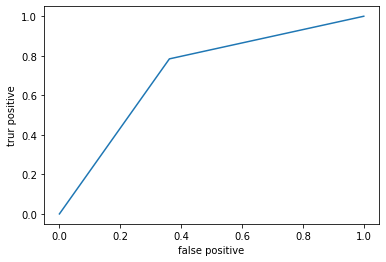

In [60]:
plt.plot(FPR,TPR);
plt.xlabel('false positive')
plt.ylabel('trur positive')


In [61]:
#Calculating AUC

metrics.auc(FPR,TPR)    # as result is more than 60%, result is good

0.7115186382125146

In [62]:
#for testing data

FPR1,TPR1,thrashold1=metrics.roc_curve(y_test,y_pred_test)

Text(0, 0.5, 'True positive')

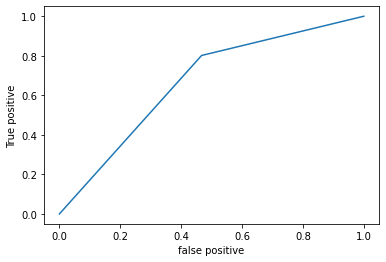

In [63]:
plt.plot(FPR1,TPR1);
plt.xlabel('false positive');
plt.ylabel('True positive')

In [64]:
metrics.auc(FPR1,TPR1)

0.6671867164428595

# KNN- K Nearest Neighbour

In [ ]:
# use for classification and regression problem

In [23]:
from sklearn.neighbors import KNeighborsClassifier

In [24]:
knn=KNeighborsClassifier(n_neighbors=3)

In [25]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [26]:
knn.score(x_train,y_train)         

0.8069029850746269

In [27]:
#Applying Scalling before training the model

from sklearn.preprocessing import StandardScaler

In [28]:
scaler=StandardScaler()

In [29]:
#without scalling
x_std=scaler.fit_transform(x_train)

In [30]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_std,y_train)

KNeighborsClassifier(n_neighbors=3)

In [31]:
knn.score(x_std,y_train)

0.8125

In [32]:
x_test.shape

(268, 5)

In [33]:
x_train.shape

(1072, 5)

In [34]:
accuracy_score(knn.predict(x_test),y_test)    #without scalling

0.5746268656716418

In [35]:
#With Scalling 

x_fit=scaler.fit(x_train)

In [36]:
x_std1=x_fit.transform(x_train)

In [37]:
knn3=KNeighborsClassifier(n_neighbors=3)

In [38]:
knn3.fit(x_std1,y_train)

KNeighborsClassifier(n_neighbors=3)

In [39]:
knn3.score(x_std1,y_train)

0.8125

In [40]:
#Scalling on testing data
x_fit_test=scaler.fit(x_test)
x_std_test=x_fit_test.transform(x_test)

In [41]:
y_pred_test_std=knn3.predict(x_std_test)

In [42]:
accuracy_score(y_pred_test_std,y_test)

0.5522388059701493

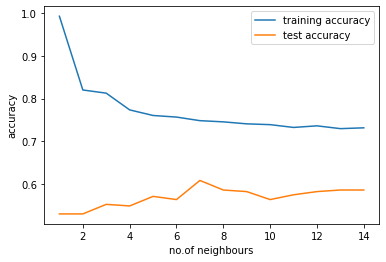

In [51]:
#Trying with more K

training_accuracy=[]
test_accuracy=[]
neighbours_count=range(1,15)       #range of k=1 to 14
for i in neighbours_count:
    knn1=KNeighborsClassifier(n_neighbors=i)
    knn1.fit(x_std1,y_train)
    training_accuracy.append(accuracy_score(y_train,knn1.predict(x_std1)))
    test_accuracy.append(accuracy_score(y_test,knn1.predict(x_std_test)))

plt.plot(neighbours_count,training_accuracy,label="training accuracy")
plt.plot(neighbours_count,test_accuracy,label="test accuracy")
plt.xlabel('no.of neighbours')
plt.ylabel('accuracy')
plt.legend()

In [44]:
training_accuracy

[0.7313432835820896]

In [52]:
len(training_accuracy)        
#to check the dimension of list we use len(list name) but to check dimension of variable we use variable name.shape

14

In [53]:
x_train.shape

(1072, 5)

Observation:-
    
Logistic Regression performed 70.99% in trainning data and 66.42% in testing data.
AUC is predicited as 71.15% in trainning data and 66.72% in testing data
KNN with scalling as performed 81.25% in frainning data and 55.22% in testing data showing overfitting of model.